In [1]:
import platform
import matplotlib
from matplotlib import font_manager

In [2]:
# 한글 및 마이너스 표시 설정
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    matplotlib.rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
matplotlib.rcParams['axes.unicode_minus'] = False
%matplotlib inline

### 랜덤포레스트 모델 만들기

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
from sklearn.datasets import load_breast_cancer
import mglearn
from sklearn.ensemble import RandomForestClassifier

cancer = load_breast_cancer()
X = cancer.data    # 입력
y = cancer.target  # 출력
# 02 데이터 셋 나누기 및 학습
X_train, X_test, y_train, y_test = train_test_split(X,y ,
                                       stratify=cancer.target, random_state=42)

In [10]:
model = RandomForestClassifier(n_estimators=10, random_state=2)  # 5개의 트리 
model.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(model.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.972


In [12]:
model.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1872583848),
 DecisionTreeClassifier(max_features='auto', random_state=794921487),
 DecisionTreeClassifier(max_features='auto', random_state=111352301),
 DecisionTreeClassifier(max_features='auto', random_state=1853453896),
 DecisionTreeClassifier(max_features='auto', random_state=213298710),
 DecisionTreeClassifier(max_features='auto', random_state=1922988331),
 DecisionTreeClassifier(max_features='auto', random_state=1869695442),
 DecisionTreeClassifier(max_features='auto', random_state=2081981515),
 DecisionTreeClassifier(max_features='auto', random_state=1805465960),
 DecisionTreeClassifier(max_features='auto', random_state=1376693511)]

In [11]:
# 5개의 모델에 대한 정확도 평가
for one_model in model.estimators_:
    print("학습용 세트 정확도 : {:.3f}".format(one_model.score(X_train, y_train)))
    print("테스트 세트 정확도 : {:.3f}".format(one_model.score(X_test, y_test)))
    print()

학습용 세트 정확도 : 0.986
테스트 세트 정확도 : 0.937

학습용 세트 정확도 : 0.981
테스트 세트 정확도 : 0.944

학습용 세트 정확도 : 0.962
테스트 세트 정확도 : 0.937

학습용 세트 정확도 : 0.986
테스트 세트 정확도 : 0.944

학습용 세트 정확도 : 0.965
테스트 세트 정확도 : 0.909

학습용 세트 정확도 : 0.958
테스트 세트 정확도 : 0.930

학습용 세트 정확도 : 0.972
테스트 세트 정확도 : 0.930

학습용 세트 정확도 : 0.967
테스트 세트 정확도 : 0.930

학습용 세트 정확도 : 0.972
테스트 세트 정확도 : 0.951

학습용 세트 정확도 : 0.967
테스트 세트 정확도 : 0.937



In [13]:
print(model.feature_importances_)  # 모델의 중요도
print(model.n_features_)           # 모델 사용 특징

[0.07418459 0.01280718 0.00833232 0.05490049 0.00384505 0.00306025
 0.00794145 0.15648187 0.00319961 0.00092582 0.05413782 0.0019431
 0.00275567 0.07461176 0.00376596 0.0114092  0.00310987 0.0041703
 0.00403085 0.00255139 0.1780884  0.03530911 0.03892907 0.08402044
 0.01435512 0.00410121 0.01446716 0.12056432 0.0197277  0.00227292]
30


In [14]:
# model : 모델
# 데이터 셋
def plot_feature_important_common(model, dataset, col_names):
  imp = model.feature_importances_                   # feature의 중요도 
  n_features = dataset.shape[1]
  feature_names = col_names

  plt.barh(range(n_features) , imp, align='center')  # 그래프(가로 막대 그래프)
    
  plt.yticks(np.arange(n_features), feature_names)   # y축 값 지정

  plt.xlabel("feature importance")   
  plt.ylabel("feature")              
  plt.ylim(-1, n_features)     

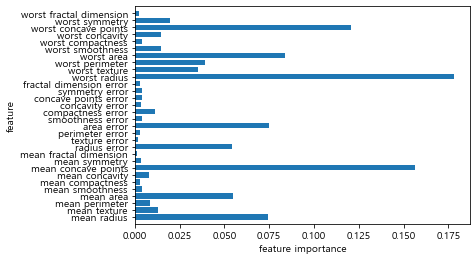

In [15]:
n_fea = cancer.data.shape[1]
plot_feature_important_common(model, cancer.data, cancer.feature_names)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
m = RandomForestClassifier(n_estimators=10, random_state=2) # 5개의 트리
m.fit(X_train, y_train)

(100, 2) (100,)


RandomForestClassifier(n_estimators=10, random_state=2)

In [21]:
m.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1872583848),
 DecisionTreeClassifier(max_features='auto', random_state=794921487),
 DecisionTreeClassifier(max_features='auto', random_state=111352301),
 DecisionTreeClassifier(max_features='auto', random_state=1853453896),
 DecisionTreeClassifier(max_features='auto', random_state=213298710),
 DecisionTreeClassifier(max_features='auto', random_state=1922988331),
 DecisionTreeClassifier(max_features='auto', random_state=1869695442),
 DecisionTreeClassifier(max_features='auto', random_state=2081981515),
 DecisionTreeClassifier(max_features='auto', random_state=1805465960),
 DecisionTreeClassifier(max_features='auto', random_state=1376693511)]

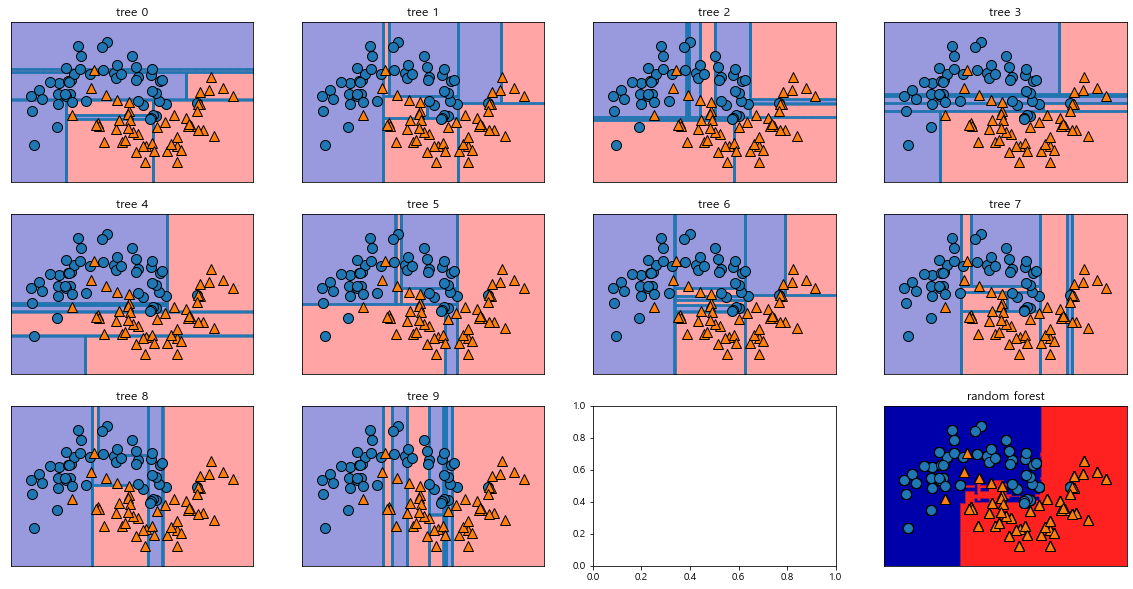

In [20]:
fig, axes = plt.subplots(3,4, figsize=(20,10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), m.estimators_)):
    ax.set_title("tree {}".format(i))  # 각 그래프 제목
    
    # 그래프 그리기 
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    mglearn.plots.plot_2d_separator(m, X, fill=True, ax=axes[-1,-1], alpha=.4)
    axes[-1, -1].set_title("random forest")
    
    mglearn.discrete_scatter(X[:, 0],X[:,1], y)

In [23]:
import seaborn as sns
tips = sns.load_dataset("tips")
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [24]:
tips.shape

(244, 7)

In [25]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [26]:
tips_have = tips.iloc[ 0:220, :]  # 현재 가진 고객 데이터
tips_new  = tips.iloc [220: , :]  # 미래의 고객 데이터 

tips_new.drop(["size"], axis=1, inplace=True)

tips_have.shape, tips_new.shape

C:\Users\wnsau\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


((220, 7), (24, 6))

In [27]:
tips_have.columns, tips_new.columns

(Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object'),
 Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time'], dtype='object'))

In [29]:
sel = ['total_bill', 'tip']

X = tips_have[sel]
y = tips_have['size']  # 우리가 예측할 컬럼(변수)

test_X = tips_new[sel]       # 예측할 친구는 다른 데이터 셋

In [30]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier() # 모델 만들기
model.fit(X, y)     # 모델 훈련시키기  model.fit(입력, 출력)
pred = model.predict(test_X)    # 학습된 모델로 예측하기
pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2,
       2, 4], dtype=int64)

In [31]:
from sklearn.model_selection import train_test_split
# random_state는 난수 발생기의 패턴을 고정시키기 위해 사용한다.
# 이를 통해 우리는 X(입력), y(출력)이 각각 학습용, 테스트용으로 나누어진다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [32]:
model = RandomForestClassifier() # 모델 만들기
model.fit(X_train, y_train)     # 모델 훈련시키기  model.fit(입력, 출력)
pred = model.predict(X_test)    # 학습된 모델로 예측하기
pred

array([2, 2, 2, 2, 3, 4, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 4, 2, 2, 3, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 3, 2, 3, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 4, 3, 2, 2, 2, 2, 2, 2], dtype=int64)

In [33]:
import numpy as np
# 정확도
# (pred == y_test).sum() / len(pred)  * 100
np.mean(pred == y_test)

0.5636363636363636